/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_90968/2317332057.py:57: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])
/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_90968/2317332057.py:57: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])
/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_90968/2317332057.py:57: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])
/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipykernel_90968/2317332057.py:57: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axs[row][col])
/var/folders/z5/kg7g8_hd67dc5v6h5v45lzkw0000gp/T/ipy

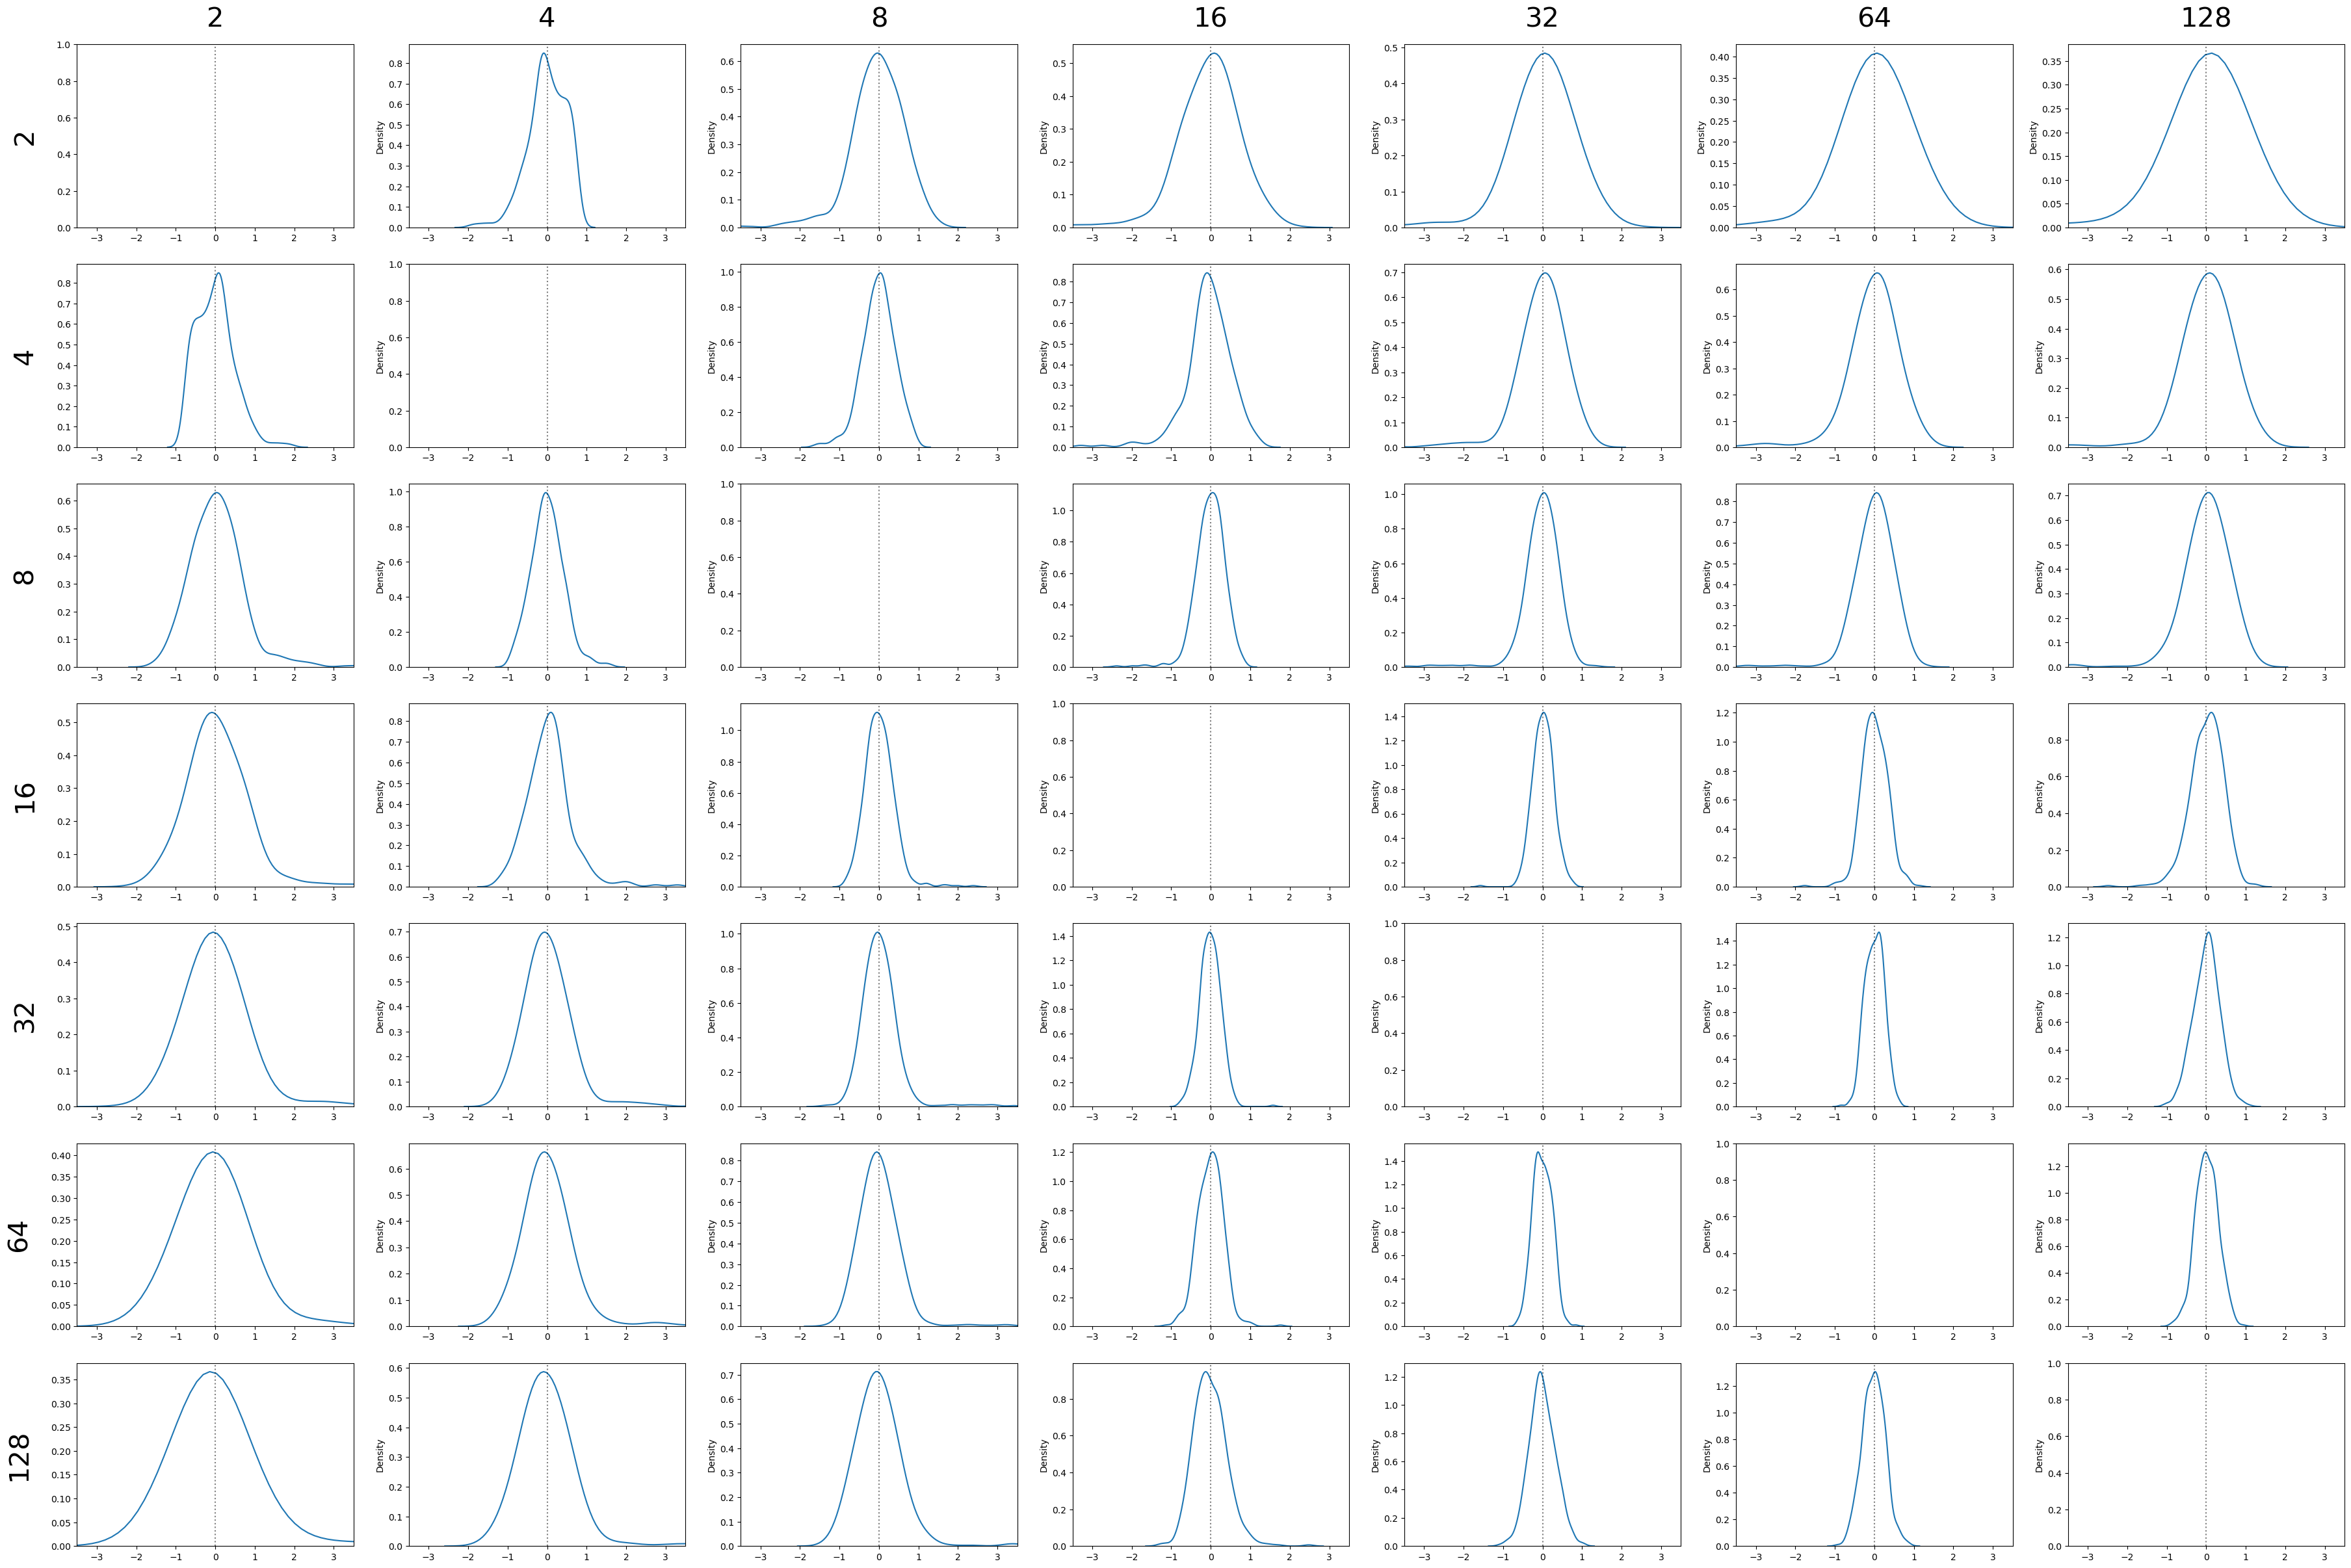

In [29]:
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

ncomps = 7
comps = [2, 4, 8, 16, 32, 64, 128]

names = [
    "2",
    "4",
    "8",
    "16",
    "32",
    "64",
    "128",
]

fig, axs = plt.subplots(
        ncols=7, nrows=7,
        figsize=(45, 30)
    )

def get_kl_div(m1_comp, m2_comp):
    n_samples = 10000
    X, y_true = make_blobs(n_samples=n_samples, n_features=2, centers=5000, cluster_std=1.0, random_state=0)
    X = X[:, ::-1]

    gm2 = GaussianMixture(n_components=m1_comp, random_state=0).fit(X)
    gm3 = GaussianMixture(n_components=m2_comp, random_state=0).fit(X)

    m1_samples = gm2.sample(500)
    m2_samples = gm3.sample(500)

    m1_m1_ll = gm2.score_samples(m1_samples[0])
    m1_m2_ll = gm2.score_samples(m2_samples[0])
    m2_m2_ll = gm3.score_samples(m2_samples[0])
    m2_m1_ll = gm3.score_samples(m1_samples[0])

    kl_div = -(m1_m1_ll + m1_m2_ll) + (m2_m1_ll + m2_m2_ll)

    return kl_div

for col in range(ncomps):
        ax = axs[0, col]
        ax.set_title(names[col], pad=20, fontsize=30)

for row in range(ncomps):
    ax = axs[row, 0]
    ax.set_ylabel(names[row], labelpad=20, fontsize=30)

for row in range(ncomps):
    for col in range(ncomps):
        data = get_kl_div(comps[row], comps[col])

        sns.kdeplot(data, ax=axs[row][col])
        axs[row][col].set_xlim(-3.5, 3.5)
        axs[row][col].axvline(x=0, color='black', linestyle=':', alpha=0.5)


In [ ]:
#### Minimal Version
# n_samples = 10000
# X, y_true = make_blobs(n_samples=n_samples, n_features=2, centers=100, random_state=0)
# X = X[:, ::-1]

# gm2 = GaussianMixture(n_components=34, random_state=0).fit(X)
# gm3 = GaussianMixture(n_components=4, random_state=0).fit(X)

# m1_samples = gm2.sample(1000)
# m2_samples = gm3.sample(1000)

# m1_m1_ll = gm2.score_samples(m1_samples[0])
# m1_m2_ll = gm2.score_samples(m2_samples[0])
# m2_m2_ll = gm3.score_samples(m2_samples[0])
# m2_m1_ll = gm3.score_samples(m1_samples[0])

# kl_div = -(m1_m1_ll + m1_m2_ll) + (m2_m1_ll + m2_m2_ll)

# sns.kdeplot(kl_div)
# plt.axvline(x=0, color='red', linestyle='--')
# plt.show()

In [ ]:
# # Authors: The scikit-learn developers
# # SPDX-License-Identifier: BSD-3-Clause

# from timeit import default_timer as timer

# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.datasets._samples_generator import make_blobs
# from sklearn.mixture import GaussianMixture
# from sklearn.utils.extmath import row_norms

# print(__doc__)

# # Generate some data

# X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
# X = X[:, ::-1]

# n_samples = 4000
# n_components = 4
# x_squared_norms = row_norms(X, squared=True)


# def get_initial_means(X, init_params, r):
#     # Run a GaussianMixture with max_iter=0 to output the initialization means
#     gmm = GaussianMixture(
#         n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
#     ).fit(X)
#     return gmm.means_


# methods = ["kmeans", "random_from_data", "k-means++", "random"]
# colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
# times_init = {}
# relative_times = {}

# plt.figure(figsize=(4 * len(methods) // 2, 6))
# plt.subplots_adjust(
#     bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
# )

# for n, method in enumerate(methods):
#     r = np.random.RandomState(seed=1234)
#     plt.subplot(2, len(methods) // 2, n + 1)

#     start = timer()
#     ini = get_initial_means(X, method, r)
#     end = timer()
#     init_time = end - start

#     gmm = GaussianMixture(
#         n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
#     ).fit(X)

#     times_init[method] = init_time
#     for i, color in enumerate(colors):
#         data = X[gmm.predict(X) == i]
#         plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

#     plt.scatter(
#         ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
#     )
#     relative_times[method] = times_init[method] / times_init[methods[0]]

#     plt.xticks(())
#     plt.yticks(())
#     plt.title(method, loc="left", fontsize=12)
#     plt.title(
#         "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
#         loc="right",
#         fontsize=10,
#     )
# plt.suptitle("GMM iterations and relative time taken to initialize")
# plt.show()